<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [76]:

serie = [0,9,2,0,2,5,5,0,0,5,1,9,2,1,3,6,5,4,4,0,2,5,0,0,7,5,5,1,5,0,5,2,1,6,4,0,3,
         7,6,4,6,4,9,3,5,5,5,5,6,0,0,5,2,6,1,0,2,6,6,5,4,2,6,0,2,5,4,0,5,5,3,6,6,1,
         2,1,0,4,1,4,5,6,8,1,9,0,9,2,6,7,4,2,0,3,1,5,0,5,4,9,6,5,0,5,9,9,2,5,
         1,1,7,7,9,8,1,8,7,0,2,7,6,1,1,6,6,5,9,2,7,9,0,1,2,9,7,9,2,0,7,5,5,5,5,7,9,
         9,0,7,5,5,6,0,4,3,5,5,3,5,0,2,0,5,0,5,6,4,3,4,9,2,6,2,8,0,4,7,6,5,2,0,3,2,
         3,0,6,2,6,6,4,5,0,6,1,4,9,6,0,3,6,9,5,0,2,4,3,5,0,5,6,4,5,5,0,3,2,0,2,1,7,
         3,3,2,5,3,5,7,5,1,3,5,9,4,6,6,5,2,0,4,0,5,0,7,2,1,5,9,5,7,4,0,3,4,5,4,0,5,
         2,2,5,4,9,7,6,0,5,5,5,5,0,0,3,5,2,2,3,9,5,7,5,3,5,9,5,4,0,2,4,4,6,1,0,5,0,
         5,0,7,0,0,0,0,2,4,4,3,0,4,3,0,2,6,0,6,5,2,6,5,0,5,5,0,2,2,5,2,4,9,0,2,5,6,
         1,0,0,0,5,8,0,5,3,0,0,3,5,0,0,2,5,2,7,2,5,0,4,5,6,9,0,5,4,0]

In [77]:
nodes = np.unique(serie)
n = len(nodes)
A = np.zeros(shape=(n,n))

In [78]:
for i in range(len(serie)-1):
    A[serie[i],serie[i+1]] = A[serie[i],serie[i+1]] + 1
A

array([[11.,  1., 14.,  8.,  6., 18.,  3.,  5.,  0.,  2.],
       [ 4.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  1.,  2.],
       [ 7.,  5.,  3.,  2.,  4., 10.,  8.,  3.,  1.,  1.],
       [ 4.,  1.,  3.,  1.,  2.,  9.,  3.,  1.,  0.,  1.],
       [ 8.,  1.,  2.,  5.,  3.,  5.,  3.,  1.,  0.,  6.],
       [19.,  4.,  9.,  5.,  8., 16.,  7.,  4.,  1.,  5.],
       [ 6.,  6.,  2.,  0.,  6.,  8.,  5.,  1.,  1.,  2.],
       [ 2.,  0.,  2.,  1.,  2.,  5.,  4.,  1.,  0.,  4.],
       [ 2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 5.,  0.,  7.,  1.,  1.,  4.,  2.,  2.,  1.,  2.]])

In [79]:
#G = nx.Graph()
G = nx.DiGraph()
G.add_nodes_from(nodes)

In [80]:
rows = A.shape[0]
cols = A.shape[1]
for i in range(0, cols - 1):
    for j in range(0, rows -1):
        if A[i,j] != 0:
            G.add_edge(i, j)
            G.edges[i, j]['color'] = "red"


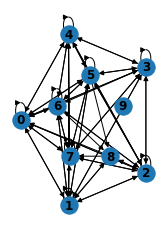

In [81]:
subax1 = plt.subplot(121)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [166]:
## Armamos miniseries de tamaño 'n' de atrás para adelante
mini = []
n = 10
for i in range(len(serie) - n + 1):
    aux=[]
    for j in range(n):
        aux.append(serie[i+j])
    mini.append(aux)
#print('mini',mini)

df = pd.DataFrame(mini)

X = df.loc[:,:n-2] ## Predictors
y = df.loc[:,n-1:]

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 5)

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_test,y_test))

#print(rf.predict([[2,5,0,4,5,6,9,0,5]]))

0.17073170731707318


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[Creating a graph Networkx](https://networkx.org/documentation/stable/tutorial.html)

[Drawing graphs Networkx](https://networkx.org/documentation/stable/tutorial.html#drawing-graphs)

[A study of visibility graphs for time series representations](https://upcommons.upc.edu/bitstream/handle/2117/328691/152711.pdf?sequence=1&isAllowed=y)